In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import  LinearSVR

In [63]:
dd = pd.read_csv("data/dd.csv")
hd = pd.read_csv("data/hd.csv")

In [64]:
dd[dd['date'] < '2012-01-01']['count'].mean()

3405.7616438356163

In [65]:
dd.head()

,date,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,season,rain,snow,israin,issnow
0,2011-01-01,0,1,0,6,0,2,0.344167,0.363625,0.913930,0.160446,331,654,985,3,0.045956,0.0,1,0
1,2011-01-02,0,1,0,0,0,2,0.363478,0.353739,0.678024,0.248539,131,670,801,3,0.055147,0.0,1,0
2,2011-01-03,0,1,0,1,1,1,0.196364,0.189405,0.236453,0.248309,120,1229,1349,3,0.000000,0.0,0,0
3,2011-01-04,0,1,0,2,1,1,0.200000,0.212122,0.445402,0.160296,108,1454,1562,3,0.000000,0.0,0,0
4,2011-01-05,0,1,0,3,1,1,0.226957,0.229270,0.467980,0.186900,82,1518,1600,3,0.000000,0.0,0,0


<Axes: >

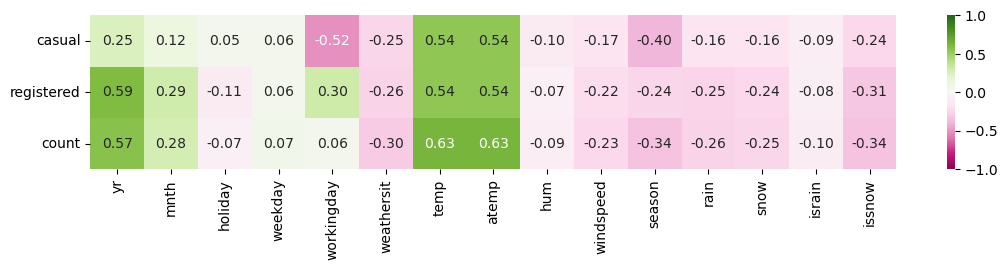

In [66]:
fig, ax = plt.subplots(figsize=(13, 2))

sns.heatmap(
        dd.corr(numeric_only=True).iloc[10:13, np.r_[0:10, 13:18]],  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

<Axes: >

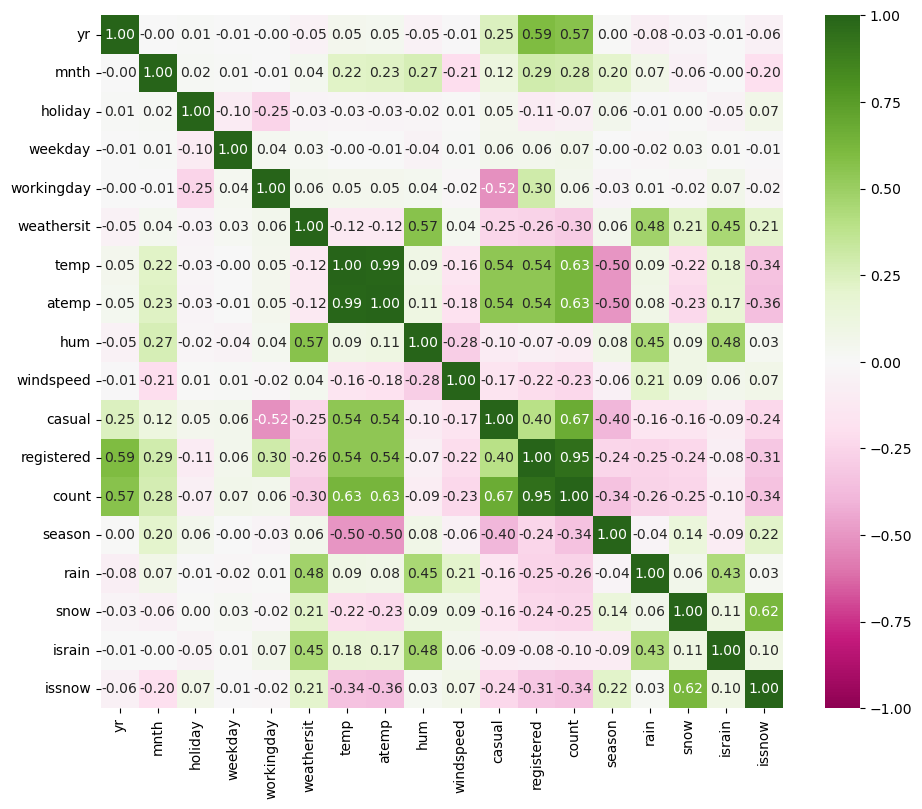

In [67]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(
        dd.corr(numeric_only=True),  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

<Axes: >

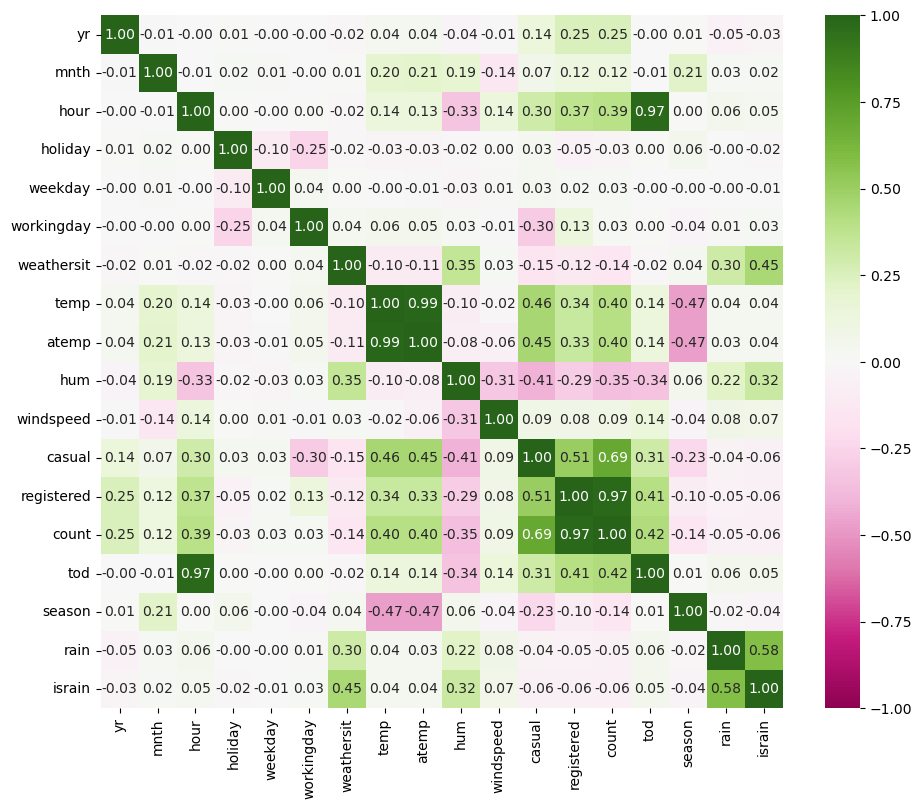

In [68]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(
        hd.corr(numeric_only=True),
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

In [69]:
['mnth', 'hour', 'holiday', 'weekday', 'weathersit', 'atemp', 'casual', 'registered', 'count', 'rain']

['mnth',
 'hour',
 'holiday',
 'weekday',
 'weathersit',
 'atemp',
 'casual',
 'registered',
 'count',
 'rain']

In [70]:
hd_enc = pd.get_dummies(hd, columns=["season", "tod"], dtype=int).drop(
    [
        "mnth",
        "hour",
        "holiday",
        "weekday",
        "weathersit",
        "atemp",
        "israin",
        "datetime",
    ],
    axis=1,
)
dd_enc = pd.get_dummies(dd, columns=["season"], dtype=int).drop(
    [
        "mnth",
        "holiday",
        "weekday",
        "weathersit",
        "atemp",
        "israin",
        "date",
        "issnow",
        "snow",
        "hum",
        "windspeed"
    ],
    axis=1,
)

In [71]:
hd_enc

,yr,workingday,temp,hum,windspeed,casual,registered,count,rain,season_0,season_1,season_2,season_3,tod_0,tod_1,tod_2,tod_3
0,0,0,0.24,0.913580,0.0000,3,13,16,0.0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.925926,0.0000,8,32,40,0.0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.950617,0.0000,5,27,32,0.0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.950617,0.0000,3,10,13,0.0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.975309,0.0000,0,1,1,0.0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,0.26,0.432099,0.1642,11,108,119,0.0,0,0,0,1,0,0,0,1
17375,1,1,0.26,0.432099,0.1642,8,81,89,0.0,0,0,0,1,0,0,0,1
17376,1,1,0.26,0.432099,0.1642,7,83,90,0.0,0,0,0,1,0,0,0,1
17377,1,1,0.26,0.444444,0.1343,13,48,61,0.0,0,0,0,1,0,0,0,1


In [72]:
dd_enc

,yr,workingday,temp,casual,registered,count,rain,season_0,season_1,season_2,season_3
0,0,0,0.344167,331,654,985,0.045956,0,0,0,1
1,0,0,0.363478,131,670,801,0.055147,0,0,0,1
2,0,1,0.196364,120,1229,1349,0.000000,0,0,0,1
3,0,1,0.200000,108,1454,1562,0.000000,0,0,0,1
4,0,1,0.226957,82,1518,1600,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,0.254167,247,1867,2114,0.029412,0,0,0,1
727,1,1,0.253333,644,2451,3095,0.000000,0,0,0,1
728,1,0,0.253333,159,1182,1341,0.049632,0,0,0,1
729,1,0,0.255833,364,1432,1796,0.000000,0,0,0,1


In [73]:
def linreg(data, user):
    X = data.drop(['registered', 'casual', 'count'], axis=1)
    y = data[user]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(r2)
    print(mse)
    print(mae)
    print(model.get_params())

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x=data["temp"], y=data[user], ax=ax)
    sns.scatterplot(x=X_test['temp'], y=y_pred, ax=ax, color="r")
    # sns.lineplot(x=y_test, y=y_pred)
    # ax.set_yticks(np.arange(0, 7500, 500))
    # ax.set_xticks(np.arange(0, 7500, 500))
    plt.show()

In [74]:
def polreg(data, user):
    X = data.drop(['registered', 'casual', 'count'], axis=1)
    y = data[user]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly_features = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    pipe = Pipeline(
        [
            # ("scaler", QuantileTransformer()),
            # Model is a ML Algorithm, Logistic Regression is good for binary classification
            ("model", LinearRegression()),
        ]
    )

    pipe.fit(poly_features, y_train)

    y_pred = pipe.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(r2)
    print(mse)
    print(mae)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x=data["temp"], y=data[user], ax=ax)
    sns.lineplot(x=X_test['temp'], y=y_pred, ax=ax, color="r")
    # sns.lineplot(x=y_test, y=y_pred)
    plt.show()

0.81167022665656
516244.50298889703
576.6055374418972
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


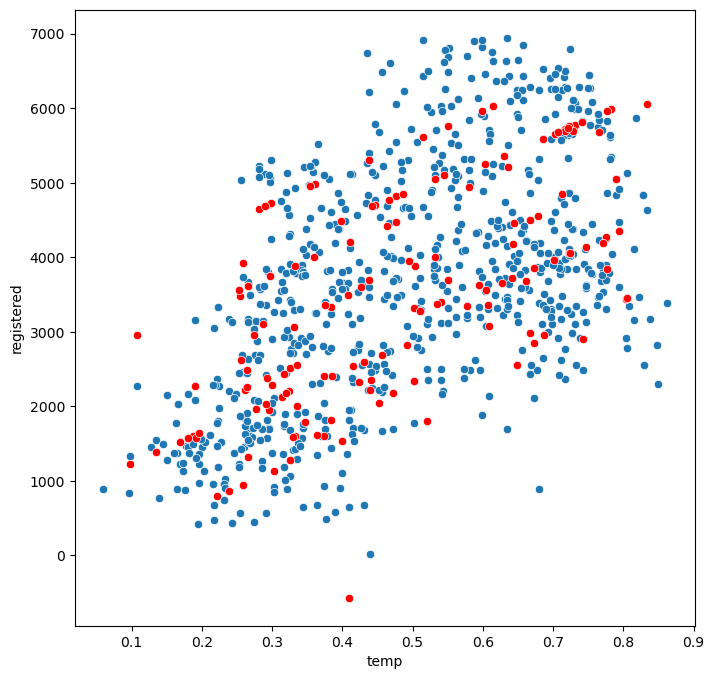

In [75]:
linreg(dd_enc, 'registered')

0.8888929981180368
304563.5214594627
425.26838860544217


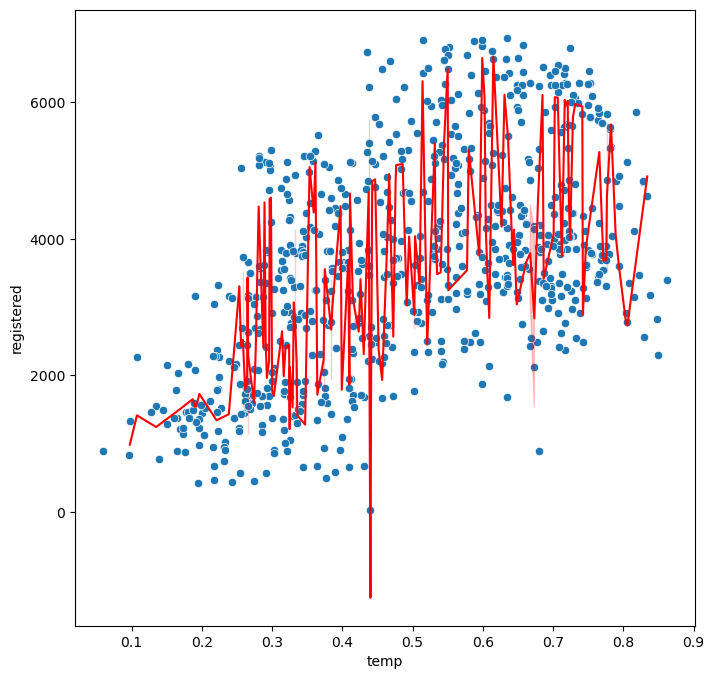

In [76]:
polreg(dd_enc, 'registered')

In [77]:
# model.params, summary
# variance inflation factor
